# Dissimilarity based on semi-variogram analysis

Introduced by Matheron (1963), the semi-variogram measure the dissimilarity of the values taken by random variables at different spatial locations as a function of a distance. Assuming stationarity and isotropy, it can be written as:
$$
\gamma(h)={{1}\over{2}} E \left[ Z(s)-Z(s+h) \right]^2 \text{, where }s\text{ denotes a spatial location, }h \text{ denotes a distance and }Z \text{ is the random variable of interest.}
$$

Using spatial samples of a random variable, it is then possible to compute an experimental or empirical semi-variogram over $n$ lags of width $ \delta $ as follows:

$\hat{\gamma}(h_i) = {{1}\over{2 N_i}} \sum \limits _{(j,k)} |Z(s_j)-Z(s_k)|^2 $, where $h_i= (i-{{1}\over{2}})\delta $ is the centre of the $ i^{th}$ lag, $1\leq i \leq n$ and $N_i$ is the number of pairs $(j,k)$ of points such that $(i-1)\delta\leq||Z(s_j)-Z(s_k)||\leq i \delta$.


Given two empirical semi-variograms $\hat{\gamma_1}$ and $\hat{\gamma_2}$, we propose to use the following distance:

$ ||\hat{\gamma_1} - \hat{\gamma_2} ||_p = \left( \sum \limits_{1\leq i \leq n} |\hat{\gamma_1}(h_i) - \hat{\gamma_2}(h_i)|^p \right)^{{{1}\over{p}}}$, where $p=2$ in the following illustrations.



### Reference
Matheron, G. (1963). Principles of geostatistics. Economic geology, 58(8), 1246-1266. https://doi.org/10.2113/gsecongeo.58.8.1246 

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import dist_experimental_variogram

picklefilenamesemivariogram = "./pickledata/testing-model-subset-semivariogram.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
seed = 65432
max3Dnbsamples = int(1.5E3)
max2Dnbsamples = int(0.8E3)
pnorm = 2 
nblags=12


# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

nsamples = len(samples_ix)
[nz,ny,nx,nbsamples]=mod_all.shape
yyy,zzz,xxx=np.meshgrid(np.arange(1,ny+1),np.flip(np.arange(1,nz+1)),np.arange(1,nx+1))
xx=xxx[0,:,:]
yy=yyy[0,:,:]
zz=zzz[0,:,:]
maxh3D = np.sqrt(nx**2+ny**2+nz**2)/3
maxh2D = np.sqrt(nx**2+ny**2)/3

## 3D continuous case

03-Jun-2021 (22:50:51) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START
img1
3D data - experimental semi-variogram computation
img2
3D data - experimental semi-variogram computation
distance computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]


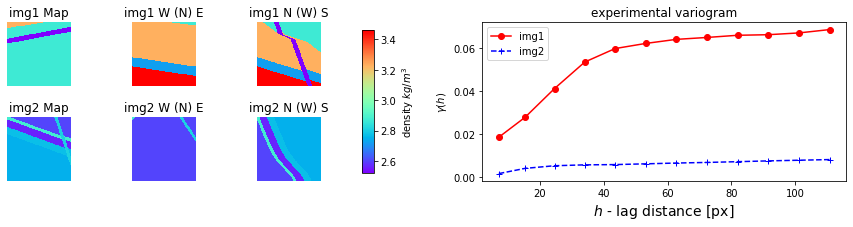

03-Jun-2021 (22:51:12) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END


In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START")
img1 = rho_all[:,:,:,sample_num1] # for illustration, we consider the density field of random sample 1
img2 = rho_all[:,:,:,sample_num2] # for illustration, we consider the density field of random sample 2
verb=True
plot=True
label="density $kg/m^3$"
dist_experimental_variogram(img1,img2,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=False,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END")

## 2D continuous case

03-Jun-2021 (22:51:13) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START
img1
2D data - experimental semi-variogram computation
img2
2D data - experimental semi-variogram computation
distance computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]


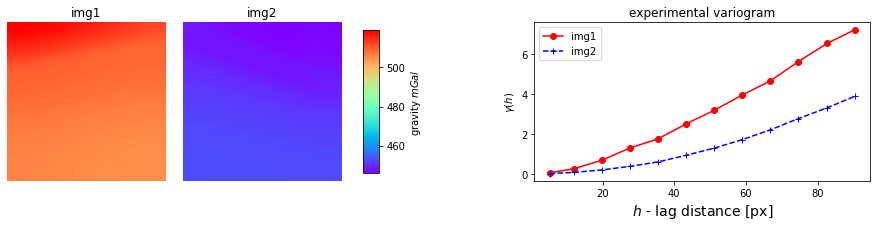

03-Jun-2021 (22:51:19) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END


In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START")
img1 = grv_all[:,:,sample_num1] # for illustration, we consider the density field of random sample 1
img2 = grv_all[:,:,sample_num2] # for illustration, we consider the density field of random sample 2
nblags=12
maxh = np.sqrt(nx**2+ny**2)/3
maxnbsamples = int(0.8E3)
pnorm = 2 
verb=True
plot=True
label="gravity $mGal$"
dist_experimental_variogram(img1,img2,xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=False,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END")

## 3D discrete case

03-Jun-2021 (22:51:19) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START
img1 lithocode$ 1.0
3D data - experimental semi-variogram computation
img2 lithocode$ 1.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 1.0: [0.05210462 0.         0.         0.         0.         0.        ]


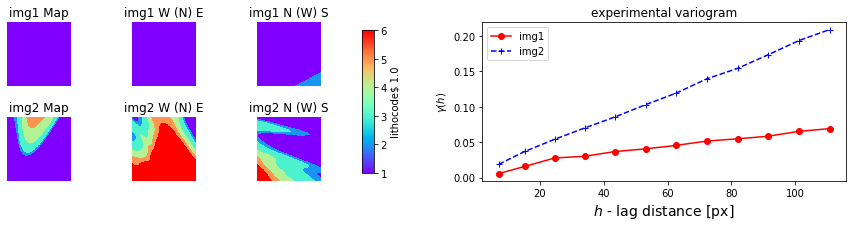

img1 lithocode$ 2.0
3D data - experimental semi-variogram computation
img2 lithocode$ 2.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 2.0: [0.05210462 0.02779454 0.         0.         0.         0.        ]


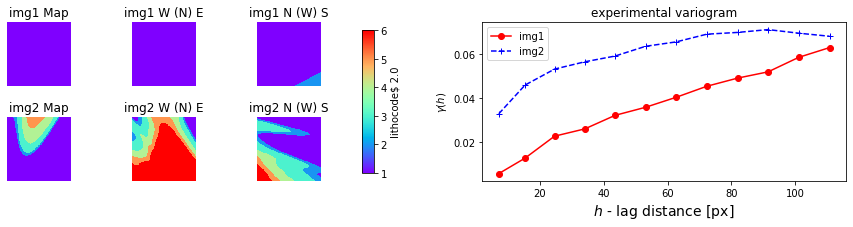

img1 lithocode$ 3.0
3D data - experimental semi-variogram computation
img2 lithocode$ 3.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 3.0: [0.05210462 0.02779454 0.09164298 0.         0.         0.        ]


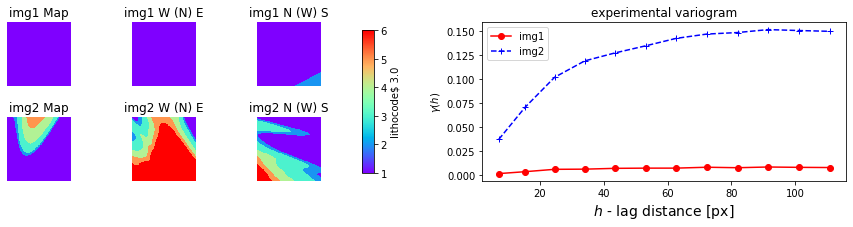

img1 lithocode$ 4.0
3D data - experimental semi-variogram computation
img2 lithocode$ 4.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 4.0: [0.05210462 0.02779454 0.09164298 0.08221516 0.         0.        ]


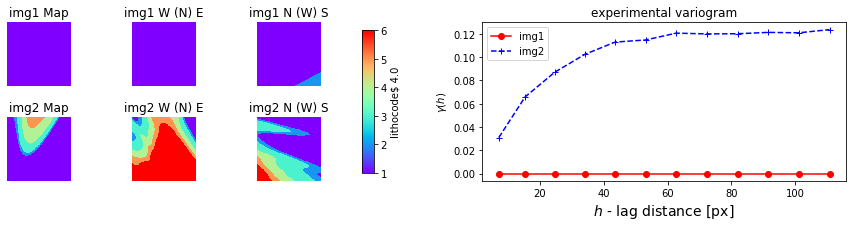

img1 lithocode$ 5.0
3D data - experimental semi-variogram computation
img2 lithocode$ 5.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 5.0: [0.05210462 0.02779454 0.09164298 0.08221516 0.05265319 0.        ]


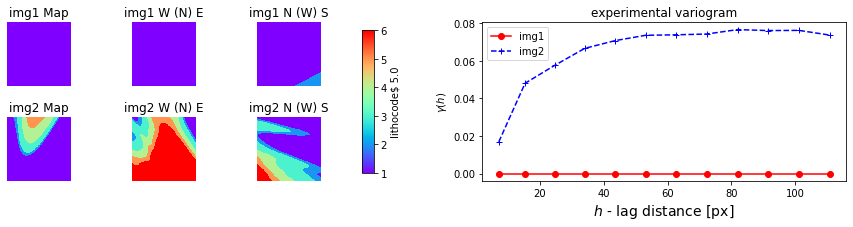

img1 lithocode$ 6.0
3D data - experimental semi-variogram computation
img2 lithocode$ 6.0
3D data - experimental semi-variogram computation
weights: [0.14,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01]
distance lithocode$ 6.0: [0.05210462 0.02779454 0.09164298 0.08221516 0.05265319 0.0595374 ]


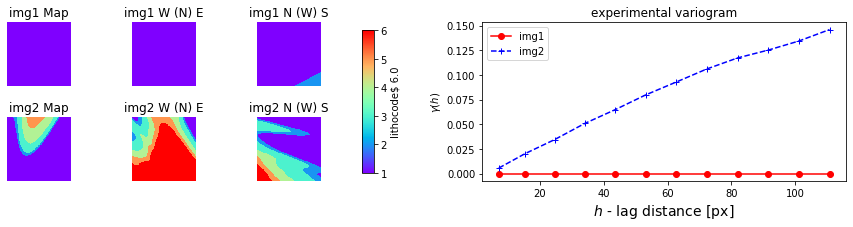

03-Jun-2021 (22:53:34) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END


In [4]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START")
img1 = mod_all[:,:,:,1] # for illustration, we consider the density field of random sample 1
img2 = mod_all[:,:,:,0] # for illustration, we consider the density field of random sample 2
nblags=12
verb=True
plot=True
label="lithocode$"
dist_experimental_variogram(img1,img2,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=True,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END")

## 2D discrete case

03-Jun-2021 (22:53:34) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START
img1 lithocode$ 1.0
2D data - experimental semi-variogram computation
img2 lithocode$ 1.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 1.0: [0.03481464 0.         0.         0.         0.         0.        ]


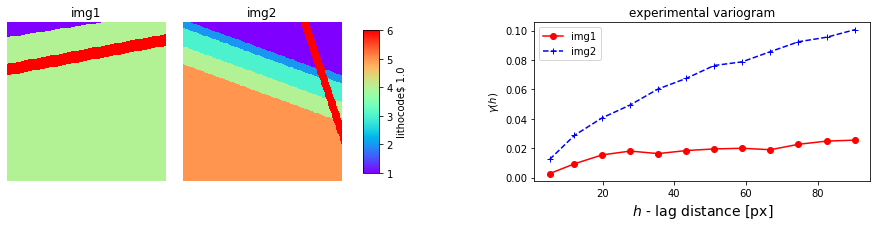

img1 lithocode$ 2.0
2D data - experimental semi-variogram computation
img2 lithocode$ 2.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 2.0: [0.03481464 0.03679081 0.         0.         0.         0.        ]


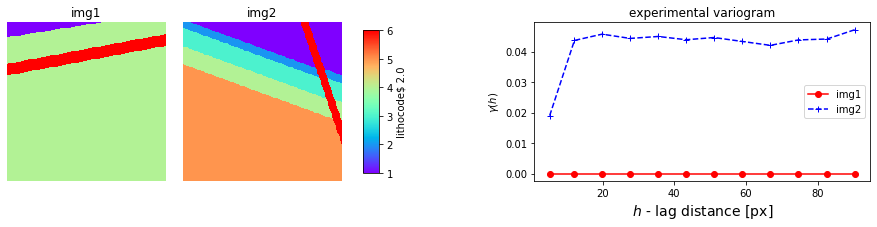

img1 lithocode$ 3.0
2D data - experimental semi-variogram computation
img2 lithocode$ 3.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 3.0: [0.03481464 0.03679081 0.0758323  0.         0.         0.        ]


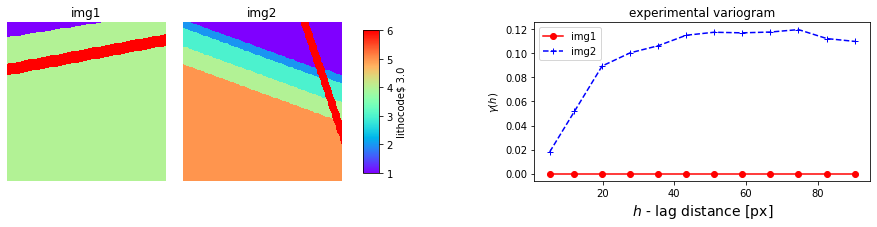

img1 lithocode$ 4.0
2D data - experimental semi-variogram computation
img2 lithocode$ 4.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 4.0: [0.03481464 0.03679081 0.0758323  0.01806008 0.         0.        ]


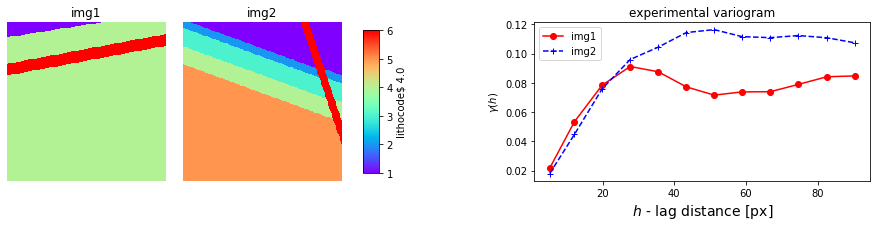

img1 lithocode$ 5.0
2D data - experimental semi-variogram computation
img2 lithocode$ 5.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 5.0: [0.03481464 0.03679081 0.0758323  0.01806008 0.07863324 0.        ]


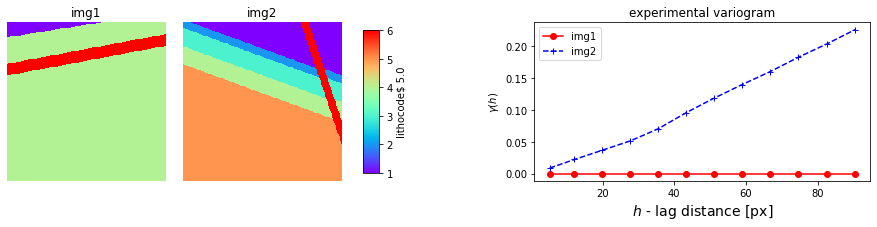

img1 lithocode$ 6.0
2D data - experimental semi-variogram computation
img2 lithocode$ 6.0
2D data - experimental semi-variogram computation
weights: [0.19,0.08,0.05,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01]
distance lithocode$ 6.0: [0.03481464 0.03679081 0.0758323  0.01806008 0.07863324 0.03109758]


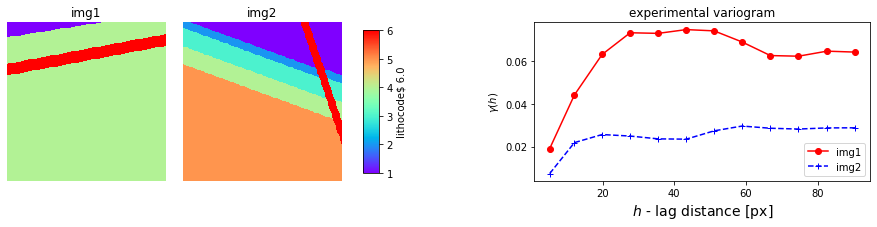

03-Jun-2021 (22:54:13) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END


In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START")
img1 = mod_all[0,:,:,sample_num1] # for illustration, we consider the density field of random sample 1
img2 = mod_all[0,:,:,sample_num2] # for illustration, we consider the density field of random sample 2
verb=True
plot=True
label="lithocode$"
dist_experimental_variogram(img1,img2,xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=True,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END")

## Compute for all data and sample pairs

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL START")

dist_2ps_mag = np.zeros((nsamples,nsamples))
dist_2ps_grv = np.zeros((nsamples,nsamples))
dist_2ps_mod = np.zeros((nsamples,nsamples))
dist_2ps_rho = np.zeros((nsamples,nsamples))
dist_2ps_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_2ps_mag[i,j] = dist_experimental_variogram(mag_all[:,:,i],mag_all[:,:,j],xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=False,verb=False,plot=False)
        dist_2ps_grv[i,j] = dist_experimental_variogram(grv_all[:,:,i],grv_all[:,:,j],xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=False,verb=False,plot=False)
        dist_2ps_mod[i,j] = dist_experimental_variogram(mod_all[:,:,:,i],mod_all[:,:,:,j],xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=True,verb=False,plot=False)
        dist_2ps_rho[i,j] = dist_experimental_variogram(rho_all[:,:,:,i],rho_all[:,:,:,j],xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=False,verb=False,plot=False)
        dist_2ps_sus[i,j] = dist_experimental_variogram(sus_all[:,:,:,i],sus_all[:,:,:,j],xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=False,verb=False,plot=False)
        dist_2ps_mag[j,i] = dist_2ps_mag[i,j]
        dist_2ps_grv[j,i] = dist_2ps_grv[i,j]
        dist_2ps_mod[j,i] = dist_2ps_mod[i,j]
        dist_2ps_rho[j,i] = dist_2ps_rho[i,j]
        dist_2ps_sus[j,i] = dist_2ps_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL END")


## Some plots in a Multi-Dimensional Scaling (reduced, 2D) space

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                    dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_2ps_mag).embedding_
mdspos_grv = mds.fit(dist_2ps_grv).embedding_
mdspos_mod = mds.fit(dist_2ps_mod).embedding_
mdspos_rho = mds.fit(dist_2ps_rho).embedding_
mdspos_sus = mds.fit(dist_2ps_sus).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_2ps_mag[ix], 'grv':dist_2ps_grv[ix], 'litho':dist_2ps_mod[ix], 'rho':dist_2ps_rho[ix], 'sus':dist_2ps_sus[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")


## Save indicators

In [ ]:
with open(picklefilenamesemivariogram, 'wb') as f:
    pickle.dump([dist_2ps_mag,dist_2ps_grv,dist_2ps_mod,dist_2ps_rho,dist_2ps_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)